# Guia 3, Marco Madile Hjelt
### 12/9/2022
Trabajo para la materia de **ML Fundamentals** del **Instituto Balseiro**.

In [1]:
import pandas as pd 
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
#import scikkit learn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.tree import export_graphviz
from sklearn import tree
import glob
from sklearn.metrics import recall_score
import xgboost as xgb
from sklearn.metrics import precision_score

c:\Users\marco\.conda\envs\ML_env_Madile\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Exploratoy data analysis

Miro con que columnas estoy tratando: 
df.head() imprime las primeros 5 filas del dataframe

In [2]:
df= pd.read_csv("data\\train_r1.csv")
df.head()

,altura,exposicion,inclinacion_suelo,distancia_agua,altura_agua,distancia_caminos,sombra_maniana,sombra_mediodia,sombra_tarde,distancia_fuego,clase_area_silvestre,clase_suelo,dosel_forestal
0,2596,51,3,258,0,510,221,232,148,6279,1,29,5
1,2804,139,9,268,65,3180,234,238,135,6121,1,12,2
2,2785,155,18,242,118,3090,238,238,122,6211,1,30,2
3,2595,45,2,153,-1,391,220,234,150,6172,1,29,5
4,2579,132,6,300,-15,67,230,237,140,6031,1,29,2


Miro el tipo de datos que tengo en cada columna:

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464810 entries, 0 to 464809
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   altura                464810 non-null  int64
 1   exposicion            464810 non-null  int64
 2   inclinacion_suelo     464810 non-null  int64
 3   distancia_agua        464810 non-null  int64
 4   altura_agua           464810 non-null  int64
 5   distancia_caminos     464810 non-null  int64
 6   sombra_maniana        464810 non-null  int64
 7   sombra_mediodia       464810 non-null  int64
 8   sombra_tarde          464810 non-null  int64
 9   distancia_fuego       464810 non-null  int64
 10  clase_area_silvestre  464810 non-null  int64
 11  clase_suelo           464810 non-null  int64
 12  dosel_forestal        464810 non-null  int64
dtypes: int64(13)
memory usage: 46.1 MB


In [75]:
df.describe()

,altura,exposicion,inclinacion_suelo,distancia_agua,altura_agua,distancia_caminos,sombra_maniana,sombra_mediodia,sombra_tarde,distancia_fuego,clase_area_silvestre,clase_suelo,dosel_forestal
count,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000
mean,2959.048884,155.433347,14.109036,269.397821,46.398492,2348.805527,212.156376,223.278200,142.472389,1981.179764,2.114387,24.349863,2.052622
std,280.204280,111.977443,7.485498,212.467759,58.231377,1559.446137,26.758641,19.768258,38.265583,1324.850716,1.061534,9.490270,1.397742
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,119.000000,1024.000000,1.000000,20.000000,1.000000
50%,2995.000000,127.000000,13.000000,218.000000,30.000000,1994.000000,218.000000,226.000000,143.000000,1710.000000,2.000000,29.000000,2.000000
75%,3163.000000,260.000000,18.000000,390.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,3.000000,31.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,598.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,4.000000,40.000000,7.000000


¿Hay valores nulos dentro de las columnas?

In [76]:
#check if any of the columns have nans 
df.isnull().any()

altura                  False
exposicion              False
inclinacion_suelo       False
distancia_agua          False
altura_agua             False
distancia_caminos       False
sombra_maniana          False
sombra_mediodia         False
sombra_tarde            False
distancia_fuego         False
clase_area_silvestre    False
clase_suelo             False
dosel_forestal          False
dtype: bool

¿Que tan correlacionados linealmente estan con la columna "dosel_forestal" (target)?

In [77]:
#get correlation matrix with dosel_forestal column
corr_matrix= df.corr()
corr_matrix["dosel_forestal"].sort_values(ascending=False)


dosel_forestal          1.000000
clase_area_silvestre    0.276909
inclinacion_suelo       0.148451
altura_agua             0.081711
exposicion              0.017143
distancia_agua         -0.020678
sombra_maniana         -0.035150
sombra_tarde           -0.048613
sombra_mediodia        -0.096597
distancia_fuego        -0.109580
distancia_caminos      -0.153914
clase_suelo            -0.165211
altura                 -0.270322
Name: dosel_forestal, dtype: float64

Distribucion de feautures y target

array([[<AxesSubplot:title={'center':'altura'}>,
        <AxesSubplot:title={'center':'exposicion'}>,
        <AxesSubplot:title={'center':'inclinacion_suelo'}>,
        <AxesSubplot:title={'center':'distancia_agua'}>],
       [<AxesSubplot:title={'center':'altura_agua'}>,
        <AxesSubplot:title={'center':'distancia_caminos'}>,
        <AxesSubplot:title={'center':'sombra_maniana'}>,
        <AxesSubplot:title={'center':'sombra_mediodia'}>],
       [<AxesSubplot:title={'center':'sombra_tarde'}>,
        <AxesSubplot:title={'center':'distancia_fuego'}>,
        <AxesSubplot:title={'center':'clase_area_silvestre'}>,
        <AxesSubplot:title={'center':'clase_suelo'}>],
       [<AxesSubplot:title={'center':'dosel_forestal'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

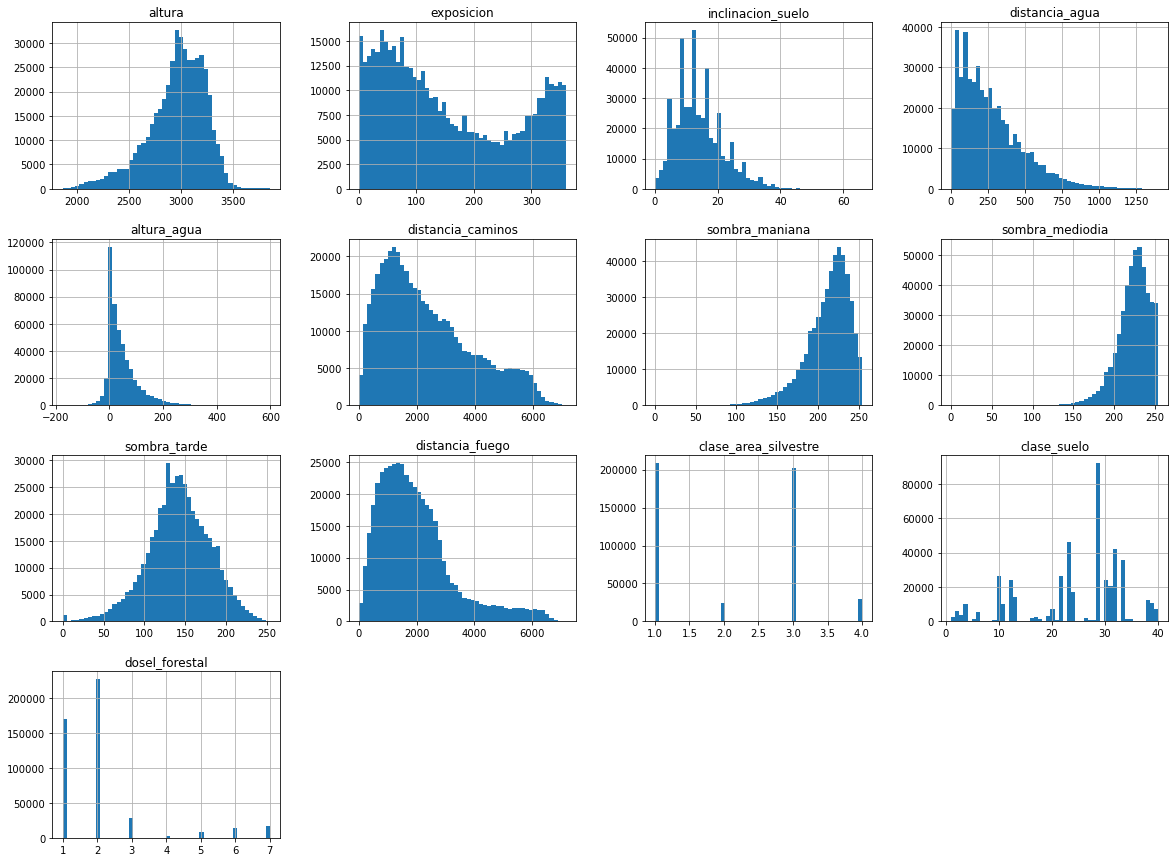

In [78]:
df.hist(bins=50, figsize=(20,15))

## Feature engineering 

Antes de empezar a jugar con los datos, voy a quedarme con un dataframe que no haya sido tocado para comparar en un futuro si estuve bien en realizar los cambios.

In [27]:
df0=df.copy()

### Sombra total

Primera idea: sombra total, me imagino que a un arbol le importa la cantidad de luz que recibe en todo su dia y no importa sea en mañana tarde o mediodia. 

In [51]:
df["sombra_total"]= (df["sombra_maniana"]+df["sombra_tarde"]+df["sombra_mediodia"])
corr_matrix= df.corr()
corr_matrix["dosel_forestal"].sort_values(ascending=False)

dosel_forestal          1.000000
clase_area_silvestre    0.276909
inclinacion_suelo       0.148451
altura_agua             0.081711
exposicion              0.017143
distancia_agua         -0.020678
sombra_maniana         -0.035150
sombra_tarde           -0.048613
sombra_mediodia        -0.096597
sombra_total           -0.108519
distancia_fuego        -0.109580
distancia_caminos      -0.153914
clase_suelo            -0.165211
altura                 -0.270322
Name: dosel_forestal, dtype: float64

Como la matriz de correlacion solo me dice que tan correlacionados linealmente estan voy a hacer un scatter plot para ver si hay alguna relacion no lineal entre atributos 

In [5]:
%matplotlib qt 
attributes= [ "sombra_maniana", "sombra_tarde","sombra_mediodia","sombra_total","dosel_forestal"]
scatter_matrix(df[attributes], c=df["dosel_forestal"], alpha=0.12)
plt.show()

No parece observarse mucha diferencia entre las sombras totales y las sombras de las horas del dia. Pero con el argumento que dí anteriormente y teniendo una mayor correlación la sombra total parece ser una mejor feature, entonces borrare las otras sombras.

In [52]:
df.drop(["sombra_maniana","sombra_tarde","sombra_mediodia"], axis=1, inplace=True)

### Distancia al agua 

La distancia del agua parece ser distancia horizontal. Con este razonamiento parece util tener una nueva feature que sea la distancia real al agua como: 

$$D = \sqrt{y_{agua}^{2}+x_{agua}^2}$$

In [53]:
df["distancia_real_agua"]= np.sqrt(  (df["altura_agua"])**2 + df["distancia_agua"]**2)
corr_matrix= df.corr()
corr_matrix["dosel_forestal"].sort_values(ascending=False)

dosel_forestal          1.000000
clase_area_silvestre    0.276909
inclinacion_suelo       0.148451
altura_agua             0.081711
exposicion              0.017143
distancia_real_agua    -0.014612
distancia_agua         -0.020678
sombra_total           -0.108519
distancia_fuego        -0.109580
distancia_caminos      -0.153914
clase_suelo            -0.165211
altura                 -0.270322
Name: dosel_forestal, dtype: float64

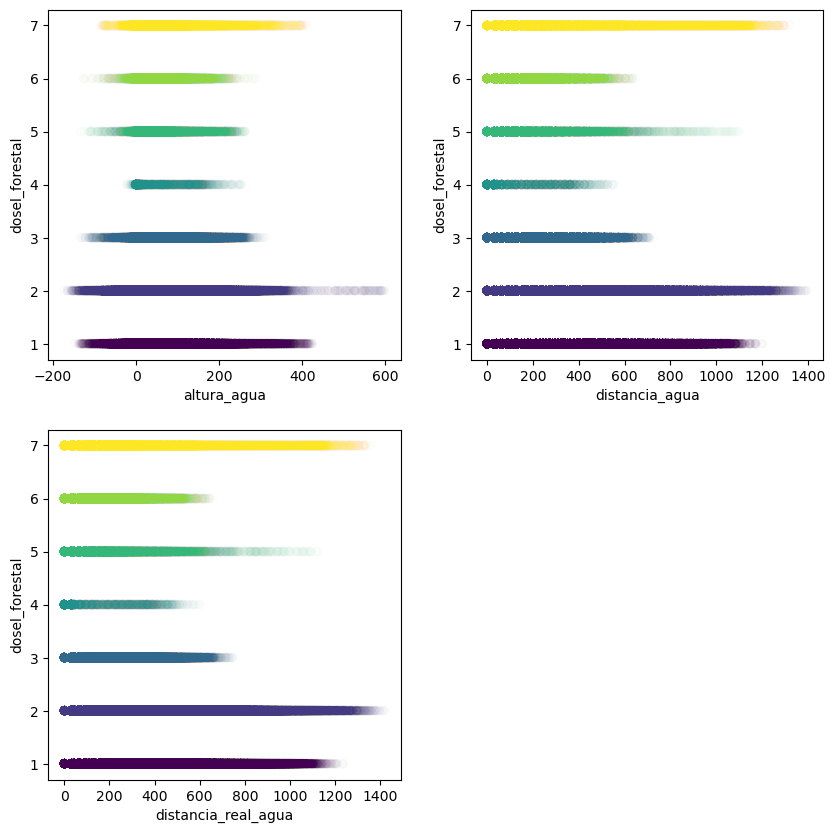

In [13]:
#plot atributos vs dosel_forestal

attributes= [ "altura_agua","distancia_agua","distancia_real_agua"]
plt.subplots(figsize=(10,10))
for i in range(3):
    plt.subplot(2,2,i+1)
    plt.scatter(df[attributes[i]], df["dosel_forestal"], c=df["dosel_forestal"], alpha=0.012)
    plt.xlabel(attributes[i])
    plt.ylabel("dosel_forestal")
plt.show()

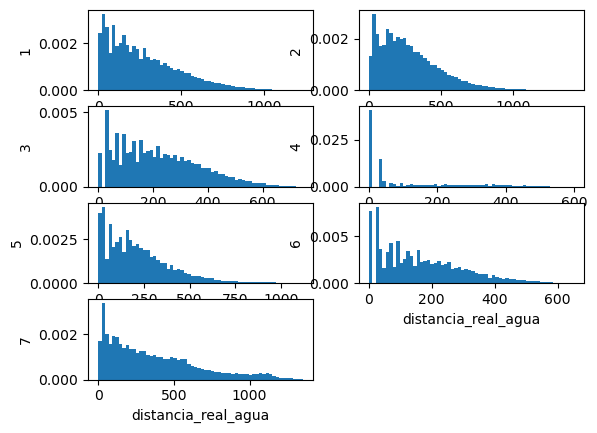

In [14]:

for i in range(1,8):
    plt.subplot(4,2,i)
    plt.hist(df[df["dosel_forestal"]==i]["distancia_real_agua"],density=True,bins=60)
    plt.xlabel("distancia_real_agua")
    plt.ylabel(str(i))
plt.show()

observando los plots y la correlación, veo que esta nueva variable no parece ser un buen predictor del tipo de dosel_forestal. 

Con ese razonamiento voy a tirar esta nueva variable y quedarme con las anteriores.

In [15]:
#drop column distancia_agua and altura_agua
df.drop(["distancia_real_agua"], axis=1, inplace=True)

### Distancia al fuego y a los caminos

idea: es posible que algunos arboles que vivan demasiado tiempo y que tengan periodos de crecimiento largos no puedan vivir y reproducirse cerca de los caminos (tomando esto como algun contaminador) o de los fuegos. Tal vez probar con el minimo de la distancia al fuego y a los caminos no sea tan mala idea.  

In [16]:

attributes= [ "distancia_fuego", "distancia_caminos","min_fuego_caminos"]
#get new column with the minimun value of each row of the 2 columns: distancia_fuego, distancia_caminos
df["min_fuego_caminos"]= df[["distancia_fuego", "distancia_caminos"]].min(axis=1)
plt.subplots(figsize=(10,10))
for i in range(3):
    plt.subplot(2,2,i+1)
    plt.scatter(df[attributes[i]], df["dosel_forestal"], c=df["dosel_forestal"], alpha=0.12)
    plt.xlabel(attributes[i])
    plt.ylabel("dosel_forestal")    
plt.show()

In [17]:
corr_matrix= df.corr()
corr_matrix["dosel_forestal"].sort_values(ascending=False)

dosel_forestal          1.000000
clase_area_silvestre    0.276909
inclinacion_suelo       0.148451
altura_agua             0.081711
exposicion              0.017143
distancia_agua         -0.020678
min_fuego_caminos      -0.082996
sombra_total           -0.108519
distancia_fuego        -0.109580
distancia_caminos      -0.153914
clase_suelo            -0.165211
altura                 -0.270322
Name: dosel_forestal, dtype: float64

Parece que no es buen indicador esta nueva feature. La voy a sacar del dataframe.

In [18]:
df.drop("min_fuego_caminos", axis=1, inplace=True)

### exposicion 

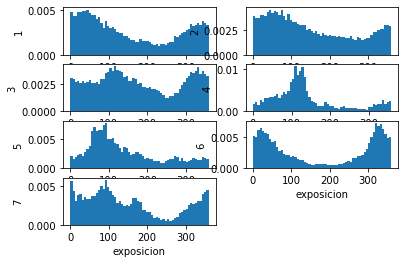

In [ ]:
for i in range(1,8):
    plt.subplot(4,2,i)
    plt.hist(df[df["dosel_forestal"]==i]["exposicion"],density=True,bins=60)
    plt.xlabel("exposicion")
    plt.ylabel(str(i))
plt.show()


Observando de esta manera al atributo exposicion, parece buena idea mantenerlo ya que podría servir descartar algun dosel_forestal 6 que parece tener baja probabilidad de exposicion $\approx$ 200

In [ ]:
df.value_counts("dosel_forestal")

dosel_forestal
2    226596
1    169395
3     28602
7     16406
6     13993
5      7614
4      2204
dtype: int64

Mire la cantidad de datos con dosel_forestal=6 por si al ser tan pocos me daban esa distribución (sampling bias)

## Random Forest 

### Training y test_split

Separo en training y en test set: 80/20 respectivamente. Para ver si la eliminación de estos atributos me afecta en el score del modelo, voy a guardar tambien el dataframe sin modificar para comparar y tener una base.

In [28]:
X= df.drop("dosel_forestal", axis=1)
y= df["dosel_forestal"]
X0=df0.drop("dosel_forestal", axis=1)
y0=df0["dosel_forestal"]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
X0_train, X0_test, y0_train, y0_test= train_test_split(X0,y0, test_size=0.2, random_state=42)

Guardo esta separación como pickle para poder usarla en el futuro

In [20]:
with open("data\\X_train.pickle", "wb") as f:
    pickle.dump(X_train, f)
with open("data\\X_test.pickle", "wb") as f:
    pickle.dump(X_test, f)
with open("data\\y_train.pickle", "wb") as f:
    pickle.dump(y_train, f)
with open("data\\y_test.pickle", "wb") as f:
    pickle.dump(y_test, f)


In [29]:
with open("data\\X0_train.pickle", "wb") as f:
    pickle.dump(X0_train, f)
with open("data\\X0_test.pickle", "wb") as f:
    pickle.dump(X0_test, f)
with open("data\\y0_train.pickle", "wb") as f:
    pickle.dump(y0_train, f)
with open("data\\y0_test.pickle", "wb") as f:
    pickle.dump(y0_test, f) 

### GridSearchCV Fiteo

Abro archivos en formato pickle

In [3]:
#Abro los archivos con pickle
with open("data\\X_train.pickle", "rb") as f:
    X_train= pickle.load(f)
with open("data\\X_test.pickle", "rb") as f:
    X_test= pickle.load(f)
with open("data\\y_train.pickle", "rb") as f:
    y_train= pickle.load(f)
with open("data\\y_test.pickle", "rb") as f:
    y_test= pickle.load(f)
with open("data\\X0_train.pickle", "rb") as f:
    X0_train= pickle.load(f)
with open("data\\X0_test.pickle", "rb") as f:
    X0_test= pickle.load(f)
with open("data\\y0_train.pickle", "rb") as f:
    y0_train= pickle.load(f)
with open("data\\y0_test.pickle", "rb") as f:
    y0_test= pickle.load(f)
    

Elijo el modelo y me armo una grilla de parametros para hacer un grid search. GridSearchCV hace un cross validation con cv=3 folds.

Yo ademas le estoy diciendo que use la metrica "accuaricy" para evaluar los modelos:

$$Accuaracy = \frac{TP + TN}{TP+TN+FP+FN}$$

Siendo TP, TN, FP, FN los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos respectivamente.

In [31]:

model= RandomForestClassifier()

#param_grid= {"n_estimators": [5,10,20,30,40], "max_depth": [None, 1,2,3,4,5,6,7,8,9,10],"max_feauteres": [None, 1,2,3,4,5,6,7,8,9,10]}
param_grid= {"n_estimators": [5,20,40], "max_depth": [None, 1,5,10],"max_features": [None, 1,4,8,10]}
grid_search= GridSearchCV(model, param_grid, cv=3,n_jobs=-1, scoring="accuracy")
grid_search0= GridSearchCV(model, param_grid, cv=3,n_jobs=-1, scoring="accuracy")

fitteo el modelo con los datos de training

In [29]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 5, 10],
                         'max_features': [None, 1, 4, 8, 10],
                         'n_estimators': [5, 20, 40]},
             scoring='accuracy')

In [30]:
with open("grid_searches\\grid_search.pkl", "wb") as f:#guardo despues de entrenar en formato pickle   
    pickle.dump(grid_search, f)

Lo mismo para el dataframe sin modificar asi tengo una base de comparación:

In [32]:
grid_search0.fit(X0_train, y0_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 5, 10],
                         'max_features': [None, 1, 4, 8, 10],
                         'n_estimators': [5, 20, 40]},
             scoring='accuracy')

In [33]:
with open("grid_searches\\grid_search_base.pkl", "wb") as f: #guardo despues de entrenar en formato pickle la base de mi prediccion
    pickle.dump(grid_search0, f)

### Predicciones

In [5]:
grid_search= pickle.load(open("grid_searches\\grid_search.pkl", "rb"))

In [39]:
grid_search0= pickle.load(open("grid_searches\\grid_search_base.pkl", "rb"))

#### Baseline

In [41]:
grid_search0.best_params_

{'max_depth': None, 'max_features': 8, 'n_estimators': 40}

In [44]:
y0_pred= grid_search0.predict(X0_test)
print(classification_report(y0_test, y0_pred))

              precision    recall  f1-score   support

           1       0.97      0.96      0.96     33935
           2       0.97      0.97      0.97     45184
           3       0.95      0.96      0.96      5872
           4       0.92      0.86      0.89       444
           5       0.92      0.85      0.88      1471
           6       0.93      0.92      0.93      2833
           7       0.97      0.95      0.96      3223

    accuracy                           0.96     92962
   macro avg       0.95      0.93      0.94     92962
weighted avg       0.96      0.96      0.96     92962



#### Post data engineering

In [46]:
#get the best parameters
grid_search.best_params_

{'max_depth': None, 'max_features': 8, 'n_estimators': 40}

Evaluo el modelo con los datos de test

In [47]:
y_pred= grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.96      0.97     33935
           2       0.97      0.97      0.97     45184
           3       0.95      0.96      0.96      5872
           4       0.92      0.87      0.89       444
           5       0.92      0.86      0.89      1471
           6       0.94      0.92      0.93      2833
           7       0.97      0.95      0.96      3223

    accuracy                           0.96     92962
   macro avg       0.95      0.93      0.94     92962
weighted avg       0.96      0.96      0.96     92962



### Feature importance y segunda iteración

Chequeo que en data engineering no haya eliminado features importantes

In [48]:
attributes0= list(X0_train.columns)
importances0= grid_search0.best_estimator_.feature_importances_
#print importances and attributes as pandas 
pd.DataFrame({"attributes": attributes0, "importances": importances0}).sort_values("importances", ascending=False)

,attributes,importances
0,altura,0.293274
5,distancia_caminos,0.139368
9,distancia_fuego,0.137108
11,clase_suelo,0.124714
3,distancia_agua,0.059843
4,altura_agua,0.049770
10,clase_area_silvestre,0.041386
7,sombra_mediodia,0.036723
6,sombra_maniana,0.034834
1,exposicion,0.033366


In [49]:
attributes= list(X_train.columns)
importances= grid_search.best_estimator_.feature_importances_
#print importances and attributes as pandas 
pd.DataFrame({"attributes": attributes, "importances": importances}).sort_values("importances", ascending=False)

,attributes,importances
0,altura,0.301675
6,distancia_fuego,0.147281
5,distancia_caminos,0.145360
8,clase_suelo,0.130176
3,distancia_agua,0.062002
1,exposicion,0.057858
4,altura_agua,0.052207
9,sombra_total,0.042663
7,clase_area_silvestre,0.033170
2,inclinacion_suelo,0.027607


Observando las importancias veo que la feature nueva es mas alta que la de las sombras maniana y tarde. Tambien veo unas features que no me parecen importantes y me gustaría ver como cambian los scores al eliminarlas.

In [58]:
atributos_eliminar= ["inclinacion_suelo", "clase_area_silvestre","altura_agua","exposicion"]
sweet_spot= {'max_depth': [None], 'max_features': [8], 'n_estimators': [40]}
atributos= list(X_train.columns)
for i in range(len(atributos_eliminar)):
    atributos.remove(atributos_eliminar[i])
    X_train2= X_train[atributos]
    X_test2= X_test[atributos]
    model= RandomForestClassifier()
    sweet_spot= {'max_depth': [None], 'max_features': [8], 'n_estimators': [40]}
    grid_search2= GridSearchCV(model, sweet_spot, cv=3,n_jobs=-1, scoring="accuracy")
    grid_search2.fit(X_train2, y_train)
    y_pred2= grid_search2.predict(X_test2)
    with open("grid_search_"+atributos_eliminar[i]+".pkl", "wb") as f: #guardo despues de entrenar en formato pickle la base de mi prediccion
        pickle.dump(grid_search2, f)
    print(atributos_eliminar[i])
   

inclinacion_suelo
clase_area_silvestre
altura_agua
exposicion


### Comparando modelos

In [61]:



with open("data\\X_test.pickle", "rb") as f:
    X_test= pickle.load(f)
with open("data\\y_test.pickle", "rb") as f:
    y_test= pickle.load(f)
with open("data\\X0_test.pickle", "rb") as f:
    X0_test= pickle.load(f)
with open("data\\y0_test.pickle", "rb") as f:
    y0_test= pickle.load(f)

A cada archivo guardado le saque las features que no me parecian importantes y guardo los scores para compararlos con los anteriores.

In [71]:
atributos_eliminar= ["inclinacion_suelo", "clase_area_silvestre","altura_agua","exposicion"]
sweet_spot= {'max_depth': [None], 'max_features': [8], 'n_estimators': [40]}
atributos= list(X_train.columns)

recall=[]
precision=[]
names=[]
grid_search= pickle.load(open("grid_searches\\grid_search.pkl", "rb"))
y_pred= grid_search.predict(X_test)
recall.append(recall_score(y_test, y_pred, average="macro"))
precision.append(precision_score(y_test, y_pred,average="macro"))
names.append("feature engineering")
#continue with the rest of the models
atributos_eliminados= ""
for i in range(len(atributos_eliminar)):
    grid_search= pickle.load(open("grid_searches\\grid_search_"+atributos_eliminar[i]+".pkl", "rb"))
    atributos.remove(atributos_eliminar[i])
    atributos_eliminados= atributos_eliminados+atributos_eliminar[i]+", "
    X_test2= X_test[atributos]
    y_pred= grid_search.predict(X_test2)
    recall.append(recall_score(y_test, y_pred, average="macro"))
    precision.append(precision_score(y_test, y_pred, average="macro"))
    names.append("sin : "+atributos_eliminados)
grid_search = pickle.load(open("grid_searches\\grid_search_base.pkl", "rb"))
y_pred= grid_search.predict(X0_test)
recall.append(recall_score(y0_test, y_pred, average="macro"))
precision.append(precision_score(y0_test, y_pred, average="macro"))
names.append("sin modificar nada")

Ahora con todos los scores me armo este grafico que me permite comparar los scores de los modelos con y sin data engineering y con y sin features eliminadas. Pasando con el mouse sobre los puntos te dice que se hizo con cada punto.

In [77]:
x = recall
y = precision

%matplotlib qt


fig,ax = plt.subplots()
sc = plt.scatter(x,y,c="r", s=100)

annot = ax.annotate("", xy=(0,0), xytext=(-100,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format( [names[n] for n in ind["ind"]])
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor("b")
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)
plt.xlabel("recall")
plt.ylabel("precision")
plt.grid()
plt.show()

### Modelo Final 

Observo que el modelo con data engineering y sin features eliminadas es el que mejor score tiene. Por lo tanto es mi modelo final. X_train.pkl , Y_train.pkl , X_test.pkl y Y_test.pkl son los archivos que usé para entrenar el modelo final. El modelo entrenado se llama "grid_search.pkl". 

## XGBOOST